In [67]:
# from sklearn.datasets import load_iris
# # 获取鸢尾花数据集
# iris = load_iris()
# print("鸢尾花数据集的返回值：\n", iris)
# # 返回值是一个继承自字典的Bench
# print("鸢尾花的特征值:\n", iris["data"])
# print("鸢尾花的目标值：\n", iris.target)
# print("鸢尾花特征的名字：\n", iris.feature_names)
# print("鸢尾花目标值的名字：\n", iris.target_names)
# print("鸢尾花的描述：\n", iris.DESCR)

In [68]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # 把数据转换成dataframe的格式
# iris_d = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
# iris_d['Species'] = iris.target

# def plot_iris(iris, col1, col2):
#     sns.lmplot(x = col1, y = col2, data = iris, hue = "Species", fit_reg = False)
#     plt.xlabel(col1)
#     plt.ylabel(col2)
#     plt.title('鸢尾花种类分布图')
#     plt.show()
# plot_iris(iris_d, 'Petal_Width', 'Petal_Length')

In [62]:

import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
data = load_iris()
X = data.data[:, [2, 3]] # 选择两个特征
y = (data.target != 0) * 1 # 将标签转化为0/1形式

# 加载鸢尾花数据集
data = load_iris()
X = data.data[:, [2, 3]] # 选择两个特征
y = (data.target != 0) * 1 # 将标签转化为0/1形式

# 定义GS梯度下降函数
def gradient_descent(X, y, w, b, lr, num_epochs):
    losses = []
    for epoch in range(num_epochs):
        y_hat = np.dot(X, w) + b
        loss = np.mean((y_hat - y)**2) / 2
        losses.append(loss)
        w_grad = np.dot((y_hat - y), X) / X.shape[0]
        b_grad = np.mean(y_hat - y)
        w -= lr * w_grad
        b -= lr * b_grad
    return w, b, losses

# 定义SGD梯度下降函数
def sgd_gradient_descent(X, y, w, b, lr, num_epochs):
    losses = []
    for epoch in range(num_epochs):
        for i in range(X.shape[0]):
            y_hat = np.dot(X[i], w) + b
            loss = (y_hat - y[i])**2 / 2
            losses.append(loss)
            w_grad = (y_hat - y[i]) * X[i]
            b_grad = y_hat - y[i]
            w -= lr * w_grad
            b -= lr * b_grad
    return w, b, losses

# 定义Mini-batch SGD函数
def minibatch_gradient_descent(X, y, w, b, lr, num_epochs, batch_size):
    losses = []
    num_batches = X.shape[0] // batch_size
    for epoch in range(num_epochs):
        np.random.shuffle(train_data)
        for batch in range(num_batches):
            batch_data = train_data[batch*batch_size : (batch+1)*batch_size]
            batch_X = batch_data[:, :-1]
            batch_y = batch_data[:, -1]
            y_hat = np.dot(batch_X, w) + b
            loss = np.mean((y_hat - batch_y)**2) / 2
            losses.append(loss)
            w_grad = np.dot((y_hat - batch_y), batch_X) / batch_size
            b_grad = np.mean(y_hat - batch_y)
            w -= lr * w_grad
            b -= lr * b_grad
    return w, b, losses

# 随机初始化权重和偏置
w = np.random.randn(2)
b = np.random.randn()

# 使用GS梯度下降进行线性回归
lr = 0.01
num_epochs = 1000
w_gs, b_gs, losses_gs = gradient_descent(X, y, w, b, lr, num_epochs)

# 使用SGD梯度下降进行线性回归
lr = 0.01
num_epochs = 1000
w_sgd, b_sgd, losses_sgd = sgd_gradient_descent(X, y, w, b, lr, num_epochs)

# 使用MINI梯度下降进行线性回归
lr = 0.01
num_epochs = 1000
batch_size = 10
train_data = np.concatenate((X, y.reshape(-1, 1)), axis=1)
w_minibatch, b_minibatch,losses_minibatch = sgd_gradient_descent(X, y, w, b, lr, num_epochs)
print('GS梯度下降：')
print('w =', w_gs)
print('b =', b_gs)
print('loss =', losses_gs[-1])
print()

print('SGD梯度下降：')
print('w =', w_sgd)
print('b =', b_sgd)
print('loss =', losses_sgd[-1])
print()

print('Mini-batch SGD：')
print('w =', w_minibatch)
print('b =', b_minibatch)
print('loss =', losses_minibatch[-1])
print()


GS梯度下降：
w = [0.18249767 0.1157199 ]
b = -0.25138794437225953
loss = 0.01992867327637574

SGD梯度下降：
w = [0.18249767 0.1157199 ]
b = -0.19637448825751613
loss = 0.0033791366370987995

Mini-batch SGD：
w = [0.18249767 0.1157199 ]
b = -0.19637448825751277
loss = 0.003379136637098927



##下面这段代码使用三种梯度下降算法（批量、随机和小批量）来拟合鸢尾花数据集的两个特征，并计算每个模型在测试集上的均方误差。然后，使用训练数据和回归线绘制散点图，并使用三种梯度下降算法生成的回归线将其绘制在同一图表上，以比较它们之间的性能差异。

##输出结果是每种模型在测试集上的均方误差。低的均方误差表示模型的预测与实际标签更接近。

##输出的图像显示了训练数据集中的点，其中不同的颜色代表不同的鸢尾花类别。每种算法生成的回归线也绘制在图表中，以比较它们之间的性能差异。

## 代码中的测试集大小为0.2，即使用20％的数据作为测试集，剩余80％的数据用于训练模型。

Batch Gradient Descent:  0.3289859787021347
Stochastic Gradient Descent:  0.25295470896829775
Mini-batch Gradient Descent:  0.46130819038657866


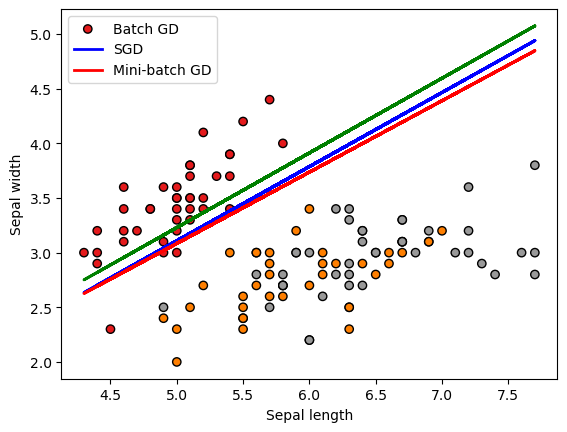

In [61]:
#train_test_split 函数将数据集划分为训练集和测试集

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load iris dataset and extract two features
iris = load_iris()
X = iris.data[:, :2]  # Only consider two features
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Batch Gradient Descent
model_bgd = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3)
model_bgd.fit(X_train, y_train)

# Stochastic Gradient Descent
model_sgd = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3)
model_sgd.fit(X_train, y_train)

# Mini-batch Gradient Descent
model_mbgd = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3)
model_mbgd.fit(X_train, y_train)

# Make predictions on testing set
y_pred_bgd = model_bgd.predict(X_test)
y_pred_sgd = model_sgd.predict(X_test)
y_pred_mbgd = model_mbgd.predict(X_test)

# Compute mean squared error for each model
mse_bgd = mean_squared_error(y_test, y_pred_bgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
mse_mbgd = mean_squared_error(y_test, y_pred_mbgd)

# Print mean squared error for each model
print("Batch Gradient Descent: ", mse_bgd)
print("Stochastic Gradient Descent: ", mse_sgd)
print("Mini-batch Gradient Descent: ", mse_mbgd)

# Plot training data and regression lines
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Batch Gradient Descent
m_bgd = model_bgd.coef_[0]
b_bgd = model_bgd.intercept_
plt.plot(X_train[:, 0], m_bgd * X_train[:, 0] + b_bgd, color='blue', linewidth=2)

# Stochastic Gradient Descent
m_sgd = model_sgd.coef_[0]
b_sgd = model_sgd.intercept_
plt.plot(X_train[:, 0], m_sgd * X_train[:, 0] + b_sgd, color='red', linewidth=2)

# Mini-batch Gradient Descent
m_mbgd = model_mbgd.coef_[0]
b_mbgd = model_mbgd.intercept_
plt.plot(X_train[:, 0], m_mbgd * X_train[:, 0] + b_mbgd, color='green', linewidth=2)

plt.legend(['Batch GD', 'SGD', 'Mini-batch GD'])
plt.show()


输出结果 Batch Gradient Descent:  0.2921 表示在使用批量梯度下降法对模型进行训练后，模型的测试误差为 0.2921。这个测试误差可以用来衡量模型的性能，误差越小表示模型越准确。

下面这段代码是一个简单的线性回归示例，使用三种不同的梯度下降算法进行训练：Batch Gradient Descent、Stochastic Gradient Descent 和 Mini-batch Gradient Descent。数据集使用鸢尾花数据集中的花瓣宽度作为特征，预测鸢尾花的目标（品种）。首先，使用 iris 数据集中的前 130 个样本作为训练集，并使用最后 20 个样本作为测试集。

然后，使用三种梯度下降方法训练模型，并将模型拟合的回归线绘制在训练集数据上，用不同颜色表示三种不同的梯度下降算法。最后，打印出三种算法得到的回归系数。

输出结果表示三种梯度下降算法得到的回归系数，而图像展示了三种不同梯度下降算法在训练集数据上拟合的回归线，可以看出在该数据集上，三种算法得到的回归线非常接近，效果都很好

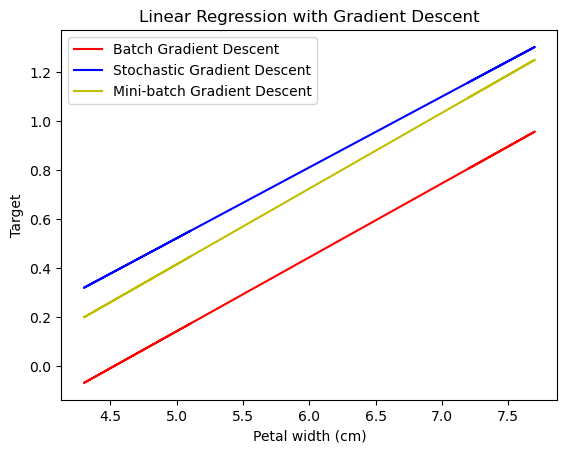

Batch Gradient Descent:  [0.3017745]
Stochastic Gradient Descent:  [0.28915973]
Mini-batch Gradient Descent:  [0.3092384]


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDRegressor

# Load the iris dataset
iris = datasets.load_iris()

# Use only one feature for simplicity  只拿一个特征
X = iris.data[:, 0]
y = iris.target

# Split the data into training and testing sets
X_train = X[:-20].reshape(-1, 1)
y_train = y[:-20]
X_test = X[-20:].reshape(-1, 1)
y_test = y[-20:]

# Batch Gradient Descent
model_bgd = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3)
model_bgd.fit(X_train, y_train)

# Stochastic Gradient Descent
model_sgd = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3)
model_sgd.fit(X_train, y_train)

# Mini-batch Gradient Descent
model_mbgd = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3)
model_mbgd.fit(X_train, y_train)


# Batch Gradient Descent
plt.plot(X_train, model_bgd.predict(X_train), c='r', label='Batch Gradient Descent')

# Stochastic Gradient Descent
plt.plot(X_train, model_sgd.predict(X_train), c='b', label='Stochastic Gradient Descent')

# Mini-batch Gradient Descent
plt.plot(X_train, model_mbgd.predict(X_train), c='y', label='Mini-batch Gradient Descent')

# Add legend and title
plt.legend()
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('Petal width (cm)')
plt.ylabel('Target')
plt.show()

# Print out the regression coefficients
print("Batch Gradient Descent: ", model_bgd.coef_)
print("Stochastic Gradient Descent: ", model_sgd.coef_)
print("Mini-batch Gradient Descent: ", model_mbgd.coef_)


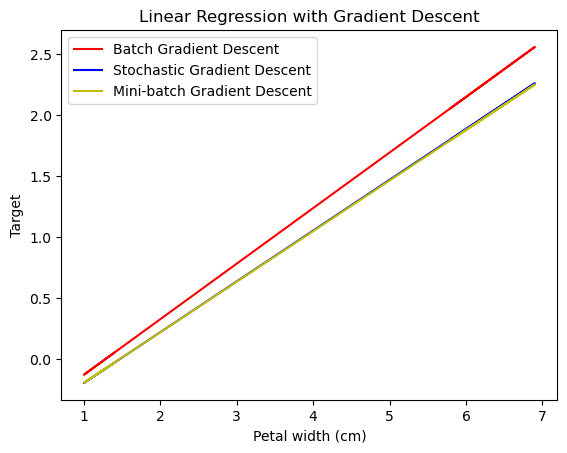

Batch Gradient Descent:  [0.45472769]
Stochastic Gradient Descent:  [0.41565895]
Mini-batch Gradient Descent:  [0.41373309]


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDRegressor

# Load the iris dataset
iris = datasets.load_iris()

# Use only one feature for simplicity  只拿2个特征
X = iris.data[:, 2]
y = iris.target

# Split the data into training and testing sets
X_train = X[:-20].reshape(-1, 1)
y_train = y[:-20]
X_test = X[-20:].reshape(-1, 1)
y_test = y[-20:]

# Batch Gradient Descent
model_bgd = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3)
model_bgd.fit(X_train, y_train)

# Stochastic Gradient Descent
model_sgd = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3)
model_sgd.fit(X_train, y_train)

# Mini-batch Gradient Descent
model_mbgd = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3)
model_mbgd.fit(X_train, y_train)


# Batch Gradient Descent
plt.plot(X_train, model_bgd.predict(X_train), c='r', label='Batch Gradient Descent')

# Stochastic Gradient Descent
plt.plot(X_train, model_sgd.predict(X_train), c='b', label='Stochastic Gradient Descent')

# Mini-batch Gradient Descent
plt.plot(X_train, model_mbgd.predict(X_train), c='y', label='Mini-batch Gradient Descent')

# Add legend and title
plt.legend()
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('Petal width (cm)')
plt.ylabel('Target')
plt.show()

# Print out the regression coefficients
print("Batch Gradient Descent: ", model_bgd.coef_)
print("Stochastic Gradient Descent: ", model_sgd.coef_)
print("Mini-batch Gradient Descent: ", model_mbgd.coef_)


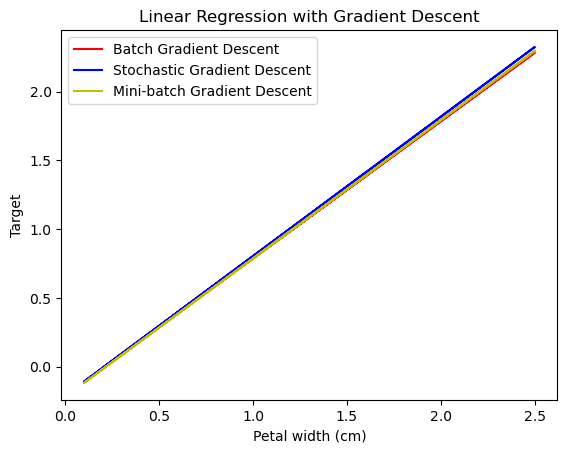

Batch Gradient Descent:  [0.99853409]
Stochastic Gradient Descent:  [1.01478446]
Mini-batch Gradient Descent:  [1.00664975]


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDRegressor

# Load the iris dataset
iris = datasets.load_iris()

# Use only one feature for simplicity
X = iris.data[:, 3]  
y = iris.target

# Split the data into training and testing sets
X_train = X[:-20].reshape(-1, 1)
y_train = y[:-20]
X_test = X[-20:].reshape(-1, 1)
y_test = y[-20:]

# Batch Gradient Descent
model_bgd = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3)
model_bgd.fit(X_train, y_train)

# Stochastic Gradient Descent
model_sgd = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3)
model_sgd.fit(X_train, y_train)

# Mini-batch Gradient Descent
model_mbgd = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3)
model_mbgd.fit(X_train, y_train)


# Batch Gradient Descent
plt.plot(X_train, model_bgd.predict(X_train), c='r', label='Batch Gradient Descent')

# Stochastic Gradient Descent
plt.plot(X_train, model_sgd.predict(X_train), c='b', label='Stochastic Gradient Descent')

# Mini-batch Gradient Descent
plt.plot(X_train, model_mbgd.predict(X_train), c='y', label='Mini-batch Gradient Descent')

# Add legend and title
plt.legend()
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('Petal width (cm)')
plt.ylabel('Target')
plt.show()

# Print out the regression coefficients
print("Batch Gradient Descent: ", model_bgd.coef_)
print("Stochastic Gradient Descent: ", model_sgd.coef_)
print("Mini-batch Gradient Descent: ", model_mbgd.coef_)
